# Imporing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from category_encoders import MEstimateEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Importing The Dataset

In [2]:
import os

# Specify your local directory path here
your_local_directory = 'C:\\Users\\Sai Ganesh\\Desktop\\Machine Learning\\Project\\Dataset'

for dirname, _, filenames in os.walk(your_local_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\Sai Ganesh\Desktop\Machine Learning\Project\Dataset\data.csv
C:\Users\Sai Ganesh\Desktop\Machine Learning\Project\Dataset\data.dat.zip
C:\Users\Sai Ganesh\Desktop\Machine Learning\Project\Dataset\output.csv


# Data Overview

In [3]:
# Importing dataset

df = pd.read_csv("C:\\Users\\Sai Ganesh\\Desktop\\Machine Learning\\Project\\Dataset\\data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# Checking the attributes of data
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
# Checking the shape of dataset

df.shape

(4600, 18)

In [6]:
# Looking at the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
# Checking for NUll values in the dataset

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
# Checking for duplicate values in the data

df.duplicated().sum()

0

In [9]:
# Number of unique values in all columns

df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


<Axes: >

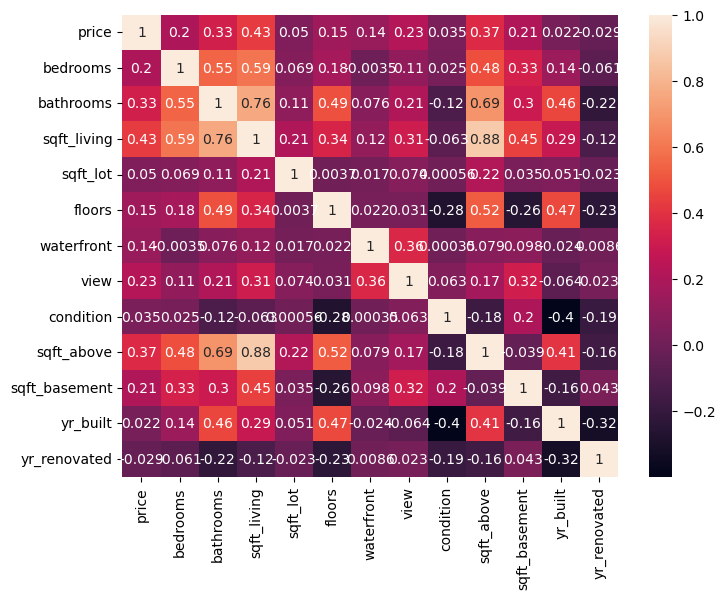

In [11]:
# Find correlation between features
x = df.select_dtypes('number')
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(), annot=True)

In [12]:
# Find mutual information score for better analysis
from sklearn.feature_selection import mutual_info_regression
def make_mi_score(X, y):
    X.copy()
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()
    
    discrete_features = X.dtypes == int
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=42)
    mi_scores = pd.Series(mi_scores, name='Mutual Information', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

# Traininig Linear Regression Model

In [13]:
X = df.drop(columns=['price'])
y = df[['price']]

mi_score = make_mi_score(X, y)
mi_score

C:\Users\Sai Ganesh\Applications\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


statezip         0.400814
sqft_living      0.336974
city             0.306828
sqft_above       0.240809
bathrooms        0.183973
sqft_lot         0.084339
yr_built         0.075015
bedrooms         0.070468
sqft_basement    0.063879
street           0.063332
floors           0.058745
view             0.050265
condition        0.011340
date             0.007973
waterfront       0.006457
yr_renovated     0.000000
country          0.000000
Name: Mutual Information, dtype: float64

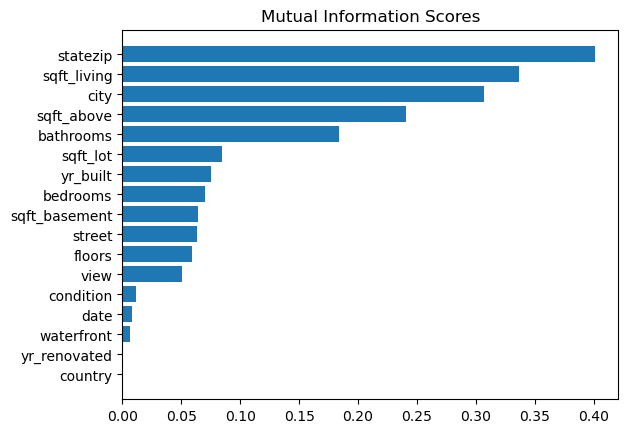

In [14]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plot_mi_scores(mi_score)

In [15]:
# turns out street have highest correlation with the price
# Now  Redifine data based on mutual information score

In [16]:
df = df[['street', 'statezip', 'city', 'sqft_living', 'sqft_above', 'bathrooms', 'sqft_lot']]
df

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,6360
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,7573
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,7014
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,6630


In [17]:
df.join(y)

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot,price
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912,3.130000e+05
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050,2.384000e+06
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947,3.420000e+05
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030,4.200000e+05
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500,5.500000e+05
...,...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,6360,3.081667e+05
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,7573,5.343333e+05
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,7014,4.169042e+05
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,6630,2.034000e+05


In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(cols=['street','statezip','city'], m=0.5)

X = encoder.fit_transform(X, y)
X

,street,statezip,city,sqft_living,sqft_above,bathrooms
0,10225.505362,6862.879765,9125.645814,1340,1340,1.50
1,10984.172029,4278.086021,5329.652531,3650,3370,2.50
2,12915.505362,18250.092120,15156.103817,1930,1930,2.00
3,10304.172029,10533.153625,13743.117829,2000,1000,2.25
4,11950.838696,11315.212236,23916.905554,1940,1140,2.50
...,...,...,...,...,...,...
4595,9190.838696,6862.879765,5329.652531,1510,1510,1.75
4596,9999.505362,13647.348305,13743.117829,1460,1460,2.50
4597,9626.838696,15887.091625,14556.419959,3010,3010,2.50
4598,9370.838696,8715.318344,5329.652531,2090,1070,2.00


# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values, test_size=0.4, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
model.score(X_train,y_train)

0.9998030938404766

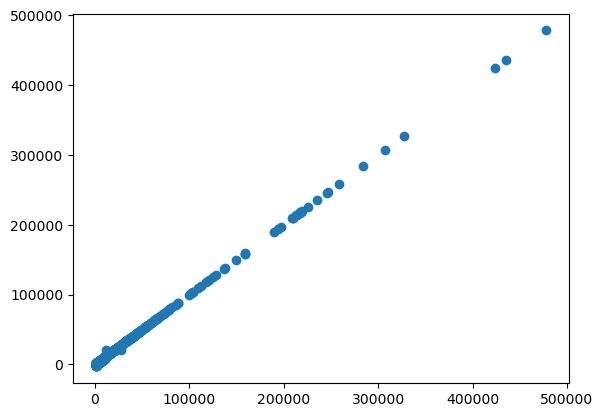

In [23]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)

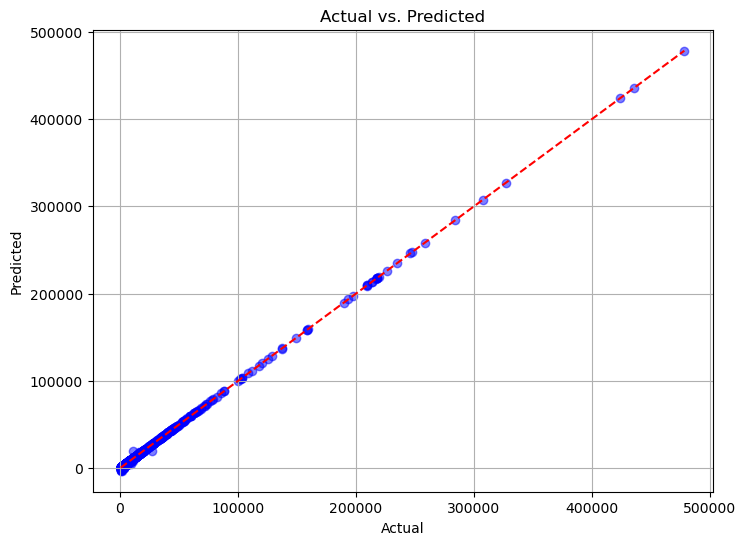

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean() * 100))

Accuracy: 99.95 %


In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 135.60138583554274
MSE: 230679.89675691386
RMSE: 480.291470626862


In [27]:
from sklearn.metrics import r2_score
r2_train = model.score(X_train, y_train)
print(f"Training R²: {r2_train:.2f}")


Training R²: 1.00


In [28]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model, X_test, y_test, cv=10, n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean() * 100))

Accuracy: 99.97 %


In [29]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Create a pipeline that scales the data and then applies linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))



Best parameters: {'regressor__fit_intercept': True}
Best cross-validation score: 1.00


Training MAE: 145.14749612729344, Test MAE: 135.6013858359372
Training MSE: 272922.4633881346, Test MSE: 230679.8967569151


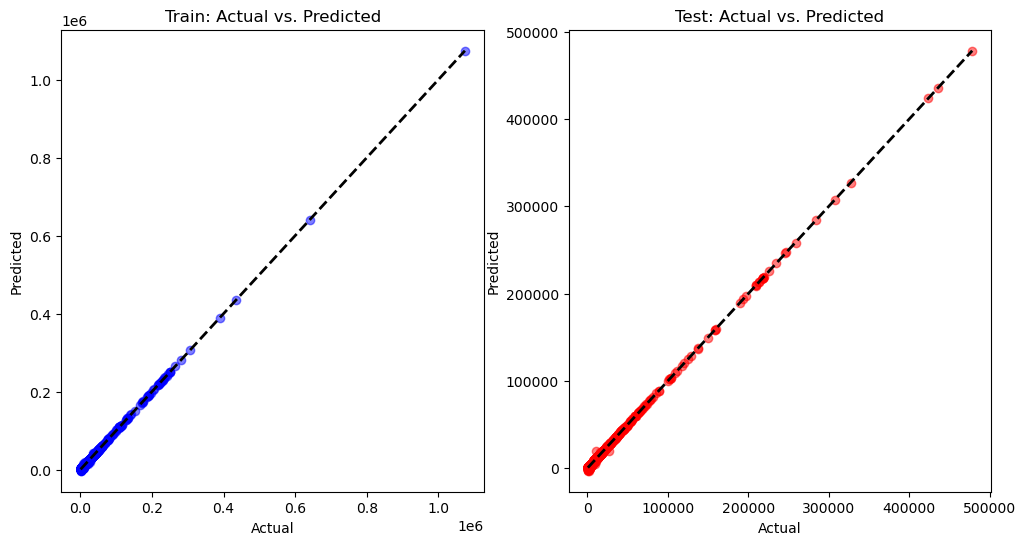

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions on training and test data
train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)

# MAE and MSE for training and test sets
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f"Training MAE: {train_mae}, Test MAE: {test_mae}")
print(f"Training MSE: {train_mse}, Test MSE: {test_mse}")

# Plotting predicted vs actual values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_preds, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Train: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, test_preds, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()


In [31]:
#Model Evaluation
predictions = grid.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"MSE: {mean_squared_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")


MAE: 135.6013858359372
MSE: 230679.8967569151
RMSE: 480.2914706268633
